In [138]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from pathlib import Path
sns.set()
sns.set_palette('colorblind');

In [198]:
logfile = '/data/logs/bigmodelbiganew/biga_nolim_elm/rep{}/logall_34999.txt'

In [199]:
i = 0
ok = True
logs = []
while ok:
    try:
        logs.append(pd.read_csv(logfile.format(i), delimiter="\t"))
    except:
        ok = False
    else:
        i += 1
log = pd.concat(logs)
    
log

,eval,iter,id,a,onOpp,nbOnOpp,curCoop,meanOwn,meanTotal
0,0,0,0,4.37261,0,0,0.000000,4.370070,4.370070
1,0,0,1,7.74800,0,0,0.000000,0.355531,0.925900
2,0,0,2,7.49085,0,0,0.000000,0.000000,0.000000
3,0,0,3,3.59920,0,0,0.000000,0.000000,0.000000
4,0,0,4,6.40691,0,0,0.000000,0.000000,0.000000
5,0,0,5,5.95782,0,0,0.000000,2.716710,3.352800
6,0,0,6,3.03533,0,0,0.000000,5.255590,5.255590
7,0,0,7,4.55151,0,0,0.000000,0.392640,2.209720
8,0,0,8,4.56648,0,0,0.000000,3.856360,3.856360
9,0,0,9,3.89499,0,0,0.000000,1.145600,2.133150


In [200]:
on_opp = log.query('onOpp == 1 and nbOnOpp >= 2')
on_opp.head(10)

,eval,iter,id,a,onOpp,nbOnOpp,curCoop,meanOwn,meanTotal
357,0,14,7,4.55151,1,3,4.101070,3.82704,4.95404
367,0,14,17,5.30720,1,3,5.550410,5.55041,15.37110
372,0,14,22,5.00859,1,3,5.719640,5.71964,15.37110
382,0,15,7,4.55151,1,3,0.923550,3.78432,5.00549
392,0,15,17,5.30720,1,3,0.477227,3.01382,8.61817
397,0,15,22,5.00859,1,3,0.464439,3.09204,8.61817
417,0,16,17,5.30720,1,2,1.765390,2.59767,6.49252
422,0,16,22,5.00859,1,2,0.475830,2.21997,6.49252
432,0,17,7,4.55151,1,3,4.355400,4.35540,9.67155
442,0,17,17,5.30720,1,3,4.470330,3.06584,7.28728


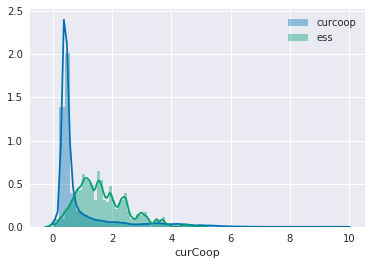

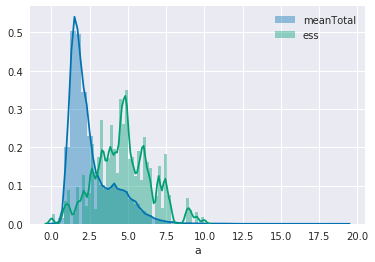

In [201]:
sns.distplot(on_opp['curCoop'], label="curcoop")
sns.distplot(on_opp['a']/on_opp['nbOnOpp'], label="ess")
plt.legend()
plt.figure()
sns.distplot(on_opp['meanTotal'], label="meanTotal")
sns.distplot(on_opp['a'], label="ess")
plt.legend();


In [202]:
print(scipy.stats.normaltest(on_opp['curCoop']))
print(scipy.stats.normaltest(on_opp['a']))

NormaltestResult(statistic=217542.49311997188, pvalue=0.0)
NormaltestResult(statistic=1848.3573706398736, pvalue=0.0)


Not normal, so wilcoxon

In [203]:
scipy.stats.wilcoxon(on_opp['curCoop'], on_opp['a']/on_opp['nbOnOpp'])

WilcoxonResult(statistic=8939232788.0, pvalue=0.0)

In [204]:
on_opp['curCoop'].median(), (on_opp['a']/on_opp['nbOnOpp']).median()

(0.445064, 1.50632)

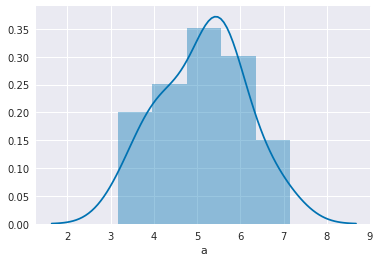

In [187]:
sns.distplot(log.groupby('id').mean()['a'])